In [1]:
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout,BatchNormalization
from keras import datasets

In [2]:
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#reshaping the y_train to convert the 2d array to 1d array for fetching the values of the dataset labels
y_train= y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:

classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_img(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y[index]])

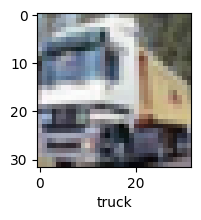

In [9]:
plot_img(x_train,y_train,1)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:
model=Sequential()

model.add(Conv2D(filters=32,activation='relu',input_shape=(32,32,3),kernel_size=(3,3)))
model.add(MaxPooling2D(2,2)),

model.add(Conv2D(filters=32,activation='relu',input_shape=(32,32,3),kernel_size=(3,3)))
model.add(MaxPooling2D(2,2)),

model.add(Flatten()),

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 7ms/step - loss: 1.4290 - accuracy: 0.4879
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1028 - accuracy: 0.6134
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9668 - accuracy: 0.6621
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8721 - accuracy: 0.6965
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8003 - accuracy: 0.7212
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7355 - accuracy: 0.7430
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6796 - accuracy: 0.7613
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6303 - accuracy: 0.7773
Epoch 9/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5780 - accuracy: 0.7975
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9609 - accuracy: 0.6981


[0.9609468579292297, 0.6980999708175659]

In [16]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [20]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [22]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [23]:
y_pred[:5]

array([[8.03361945e-06, 1.02210470e-06, 2.44890340e-04, 9.00099218e-01,
        7.31373461e-07, 7.91716054e-02, 2.04300173e-02, 2.45682531e-05,
        1.97890040e-05, 1.63236464e-07],
       [2.86062335e-04, 1.68106277e-02, 5.13722120e-10, 4.27626246e-09,
        6.72166038e-08, 1.64131597e-10, 4.55292158e-11, 1.15247690e-11,
        9.82868791e-01, 3.43982465e-05],
       [1.04415435e-02, 2.56970208e-02, 1.81933545e-04, 5.90900483e-04,
        1.50768040e-03, 2.83641304e-04, 1.14281116e-04, 1.84982142e-04,
        9.24129188e-01, 3.68688740e-02],
       [8.56713176e-01, 2.03279103e-03, 9.50844306e-03, 2.64927745e-03,
        2.91994330e-03, 2.92547993e-05, 7.71889245e-06, 8.43309863e-06,
        1.25966266e-01, 1.64727127e-04],
       [1.12831144e-09, 1.11713334e-07, 9.27625224e-03, 4.83427849e-03,
        8.55708599e-01, 3.19160696e-04, 1.29861459e-01, 6.04624546e-08,
        2.67283564e-08, 3.09747001e-08]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

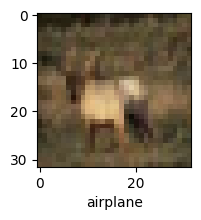

In [32]:
plot_img(x_test,y_test,3)

In [31]:
classes[y_classes[3]]

'airplane'